In [1]:
# Import pandas 
import pandas as pd 
import matplotlib.pyplot as plt 

Checkpoints - Part 1

In [2]:
folder_path="C:\\Users\\hp\Desktop\\MyLearning\\Assignment\\"

In [3]:
# reading txt file  
companies_df=pd.read_csv(folder_path+"companies.txt", sep='\t',encoding='ISO-8859-1') 
companies_df['permalink']=companies_df.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [4]:
# reading csv file 
rounds2_df=pd.read_csv(folder_path+"rounds2.csv", encoding='ISO-8859-1')
rounds2_df['company_permalink']=rounds2_df.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

Analysis of the rounds2.csv file

In [5]:
rounds2_df.shape

(114949, 6)

In [6]:
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
rounds2_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
#convert all values of company_permalink column to lower case 
rounds2_df['company_permalink']=rounds2_df['company_permalink'].apply(lambda x: x.lower()) 

In [9]:
rounds2_df_sliced = rounds2_df [["company_permalink","funding_round_permalink","funding_round_type","funded_at","funding_round_code"]]
rounds2_df_sliced.describe()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,funding_round_code
count,114949,114949,114949,114949,31140
unique,66368,114949,14,5033,8
top,/organization/solarflare,/funding-round/8c1a03ed17fdbc5fde0c9ebb51f37725,venture,01-01-2014,A
freq,19,1,55494,779,14747


In [10]:
len(rounds2_df.company_permalink.unique())

66368

In [11]:
#check for duplicated rows
rounds2_df.duplicated().sum()

0

Analysis of the companies.txt file

In [12]:
companies_df.shape

(66368, 10)

In [13]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [14]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [15]:
companies_df.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetl...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [16]:
#convert all values of permalink column to lower case 

companies_df['permalink']=companies_df['permalink'].apply(lambda x: x.lower()) 

In [17]:
companies_df.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/sparrow,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [18]:
#check for duplicated rows
companies_df.duplicated().sum()

0

In [19]:
#Check if entries of all companies present in both tables
len(set(rounds2_df.company_permalink).difference(set(companies_df.permalink)))

0

Empty result for above query indicates that all companies from round2_df are present in companies_df

In [20]:
rounds2_df.rename(columns={'company_permalink':'permalink'},inplace=True)

In [21]:
#merging two dfs to create the master_frame
master_frame = pd.merge(rounds2_df,companies_df, on='permalink',how='outer')
master_frameforPlot=master_frame  #creating one more object for drawing plots

In [22]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [23]:
master_frame.shape

(114949, 15)

In [24]:
df_sliced = master_frame [["permalink","funding_round_permalink","funding_round_type","funded_at","funding_round_code","name","homepage_url","category_list","country_code","state_code"]]
df_sliced.describe()

,permalink,funding_round_permalink,funding_round_type,funded_at,funding_round_code,name,homepage_url,category_list,country_code,state_code
count,114949,114949,114949,114949,31140,114948,108815,111539,106271,104003
unique,66368,114949,14,5033,8,66102,61191,27296,137,311
top,/organization/solarflare,/funding-round/8c1a03ed17fdbc5fde0c9ebb51f37725,venture,01-01-2014,A,Solarflare Communications,http://www.solarflare.com,Biotechnology,USA,CA
freq,19,1,55494,779,14747,19,19,8165,72308,26664


In [25]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

Checkpoint 2: Funding Type Analysis

In [26]:
df_by_segment = master_frame.groupby('funding_round_type')
df_by_segment_med=df_by_segment['raised_amount_usd'].median().reset_index(name="median")

In [27]:
df_by_segment_med

,funding_round_type,median
0,angel,400000.0
1,convertible_note,272000.0
2,debt_financing,1100000.0
3,equity_crowdfunding,100000.0
4,grant,201684.0
5,non_equity_assistance,60000.0
6,post_ipo_debt,19950000.0
7,post_ipo_equity,12262852.5
8,private_equity,20000000.0
9,product_crowdfunding,183915.0


In [28]:
#Avgerage Investment in between 5M to 15M
df_by_segment_med[df_by_segment_med['median'].between(5000000 ,15000000)]

,funding_round_type,median
7,post_ipo_equity,12262852.5
13,venture,5000000.0


Checkpoint 3: Country Analysis

In [29]:
#select data of venture as funding_round_type
master_frame=master_frame[master_frame['funding_round_type']=='venture']

In [30]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [31]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                55494 non-null  object 
 1   funding_round_permalink  55494 non-null  object 
 2   funding_round_type       55494 non-null  object 
 3   funding_round_code       30985 non-null  object 
 4   funded_at                55494 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   name                     55494 non-null  object 
 7   homepage_url             52549 non-null  object 
 8   category_list            54362 non-null  object 
 9   status                   55494 non-null  object 
 10  country_code             52619 non-null  object 
 11  state_code               51698 non-null  object 
 12  region                   51940 non-null  object 
 13  city                     51940 non-null  object 
 14  founded_at           

In [32]:
len(master_frame[(master_frame.country_code.isna())])

2875

In [33]:
len(master_frame[(master_frame.country_code.isna()) & (master_frame.state_code.isna()) & (master_frame.region.isna())])

2875

In [34]:
master_frame[(master_frame.country_code.isna()) & (master_frame.state_code.notna()) & (master_frame.region.notna())]

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [35]:
# Above result implies that if state code is not present then the country_code and region is also not present.
# As Spark Funds have strong deciding crriteria on country , lets drop rows whose country code or other region lated data is missing.

In [36]:
#dropping the data whose country is not available
master_frame=master_frame[pd.notnull(master_frame['country_code'])]

In [37]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52619 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                52619 non-null  object 
 1   funding_round_permalink  52619 non-null  object 
 2   funding_round_type       52619 non-null  object 
 3   funding_round_code       29442 non-null  object 
 4   funded_at                52619 non-null  object 
 5   raised_amount_usd        48111 non-null  float64
 6   name                     52619 non-null  object 
 7   homepage_url             50301 non-null  object 
 8   category_list            52024 non-null  object 
 9   status                   52619 non-null  object 
 10  country_code             52619 non-null  object 
 11  state_code               51698 non-null  object 
 12  region                   51940 non-null  object 
 13  city                     51940 non-null  object 
 14  founded_at           

In [38]:
master_frame_cc=master_frame.groupby('country_code')

In [39]:
pd.options.display.float_format = '{:.5f}'.format
#selecting top9 countires based on investment amount
master_frame_t9=master_frame_cc['raised_amount_usd'].sum().sort_values(ascending = False).head(9)

In [40]:
master_frame_t9

country_code
USA   422510842796.00000
CHN    39835418773.00000
GBR    20245627416.00000
IND    14391858718.00000
CAN     9583332317.00000
FRA     7259536732.00000
ISR     6907514579.00000
DEU     6346959822.00000
JPN     3363676611.00000
Name: raised_amount_usd, dtype: float64

In [41]:
master_frame_t9.keys()

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country_code')

In [42]:
filter1 = master_frame["country_code"].isin(master_frame_t9.keys()) 

In [43]:
top9=master_frame[filter1]

In [44]:
top9.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00000,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [45]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48099 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                48099 non-null  object 
 1   funding_round_permalink  48099 non-null  object 
 2   funding_round_type       48099 non-null  object 
 3   funding_round_code       26930 non-null  object 
 4   funded_at                48099 non-null  object 
 5   raised_amount_usd        44383 non-null  float64
 6   name                     48099 non-null  object 
 7   homepage_url             45902 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   48099 non-null  object 
 10  country_code             48099 non-null  object 
 11  state_code               47768 non-null  object 
 12  region                   47596 non-null  object 
 13  city                     47596 non-null  object 
 14  founded_at           

In [46]:
top9.shape

(48099, 15)

In [47]:
top9[top9.category_list.isna()]

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
99,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.00000,123Feng.Com,http://123feng.com/,NaN,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014
181,/organization/1mxians,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.00000,1mxians,http://www.1mxian.com/,NaN,operating,CHN,22,Beijing,Beijing,01-01-2014
528,/organization/3pl-central,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,17500000.00000,3PL Central,http://3plcentral.com/,NaN,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006
715,/organization/51cto,/funding-round/8e4af9cbe06e0c5883b90d11a7c6251c,venture,NaN,23-11-2015,16000000.00000,51CTO,http://www.51cto.com/,NaN,operating,CHN,22,Beijing,Beijing,NaN
782,/organization/60frames-entertainment,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,A,02-08-2007,3500000.00000,60Frames Entertainment,http://60frames.com/,NaN,closed,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112505,/organization/xytrans,/funding-round/72c6ca0c4590f3c4ae6500fb81746649,venture,E,29-11-2006,nan,Xytrans,NaN,NaN,closed,USA,FL,Orlando,Orlando,01-01-2000
112536,/organization/yadu,/funding-round/918ffbf860c5561c4f068f4491818bab,venture,A,18-08-2006,nan,Yadu,http://www.yadu.com/,NaN,operating,CHN,22,Beijing,Beijing,NaN
112785,/organization/yellowjacket,/funding-round/e8a4037e2a35175aac61cd3c3153eb7e,venture,NaN,09-08-2007,1250000.00000,YellowJacket,http://www.yjenergy.com,NaN,closed,USA,NY,New York City,New York,NaN
112951,/organization/yodel,/funding-round/cd2b175af6d20770079461335d2cf44e,venture,A,02-06-2005,8000000.00000,Yodel,NaN,NaN,closed,USA,CA,SF Bay Area,San Francisco,NaN


In [48]:
#as Spark funds also looking for category of company before investing, let's drop the companies which don't have category specified

In [49]:
top9=top9[pd.notnull(top9['category_list'])]

In [50]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47614 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47614 non-null  object 
 1   funding_round_permalink  47614 non-null  object 
 2   funding_round_type       47614 non-null  object 
 3   funding_round_code       26717 non-null  object 
 4   funded_at                47614 non-null  object 
 5   raised_amount_usd        44118 non-null  float64
 6   name                     47614 non-null  object 
 7   homepage_url             45505 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   47614 non-null  object 
 10  country_code             47614 non-null  object 
 11  state_code               47286 non-null  object 
 12  region                   47116 non-null  object 
 13  city                     47116 non-null  object 
 14  founded_at           

Checkpoint 4: Sector Analysis 1

In [51]:
#convert all values of category_list column to lower case 
top9.category_list=top9.category_list.apply(lambda x: x.lower()) 

In [52]:
#map category_list to first value of the list
top9.category_list=top9.category_list.apply(lambda x : x.split("|")[0])

In [53]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47614 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47614 non-null  object 
 1   funding_round_permalink  47614 non-null  object 
 2   funding_round_type       47614 non-null  object 
 3   funding_round_code       26717 non-null  object 
 4   funded_at                47614 non-null  object 
 5   raised_amount_usd        44118 non-null  float64
 6   name                     47614 non-null  object 
 7   homepage_url             45505 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   47614 non-null  object 
 10  country_code             47614 non-null  object 
 11  state_code               47286 non-null  object 
 12  region                   47116 non-null  object 
 13  city                     47116 non-null  object 
 14  founded_at           

In [54]:
top9.tail()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00000,Zyrra,http://www.zyrra.com,e-commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00000,Zystor,http://www.zystor.com,biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114941,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.00000,ZZNode Science and Technology,http://www.zznode.com,enterprise software,operating,CHN,22,Beijing,Beijing,NaN


In [55]:
top9

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00000,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00000,Zyrra,http://www.zyrra.com,e-commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00000,Zystor,http://www.zystor.com,biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN


In [56]:
#read mapping data from csv file
mapping=pd.read_csv(folder_path+"mapping.csv", encoding='ISO-8859-1') 

In [57]:
mapping.columns[1:]

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [58]:
#make mapping data consistent
#convert all values of category_list column to lower case 
mapping.category_list=mapping.category_list.apply(lambda x: str(x).lower()) 
mapping.category_list=mapping.category_list.str.replace("0","na")
mapping.category_list=mapping.category_list.str.replace("enterprise 2.na","enterprise 2.0")

In [59]:
mapping.category_list.str.contains("0").sum()

1

In [60]:
#convert mapping wide format data to long format data
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})


In [61]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 5479
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [62]:
mapping.describe()

,category_list,main_sector
count,687,687
unique,687,8
top,stock exchanges,Others
freq,1,195


In [63]:
mapping.tail()

,category_list,main_sector
5433,social recruiting,"Social, Finance, Analytics, Advertising"
5434,social television,"Social, Finance, Analytics, Advertising"
5435,social travel,"Social, Finance, Analytics, Advertising"
5446,stock exchanges,"Social, Finance, Analytics, Advertising"
5479,venture capital,"Social, Finance, Analytics, Advertising"


In [64]:
top9 = pd.merge(top9,mapping, on='category_list',how='left')

In [65]:
top9

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Others
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00000,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47609,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors
47610,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors
47611,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.00000,Zyrra,http://www.zyrra.com,e-commerce,operating,USA,MA,Boston,Cambridge,NaN,Others
47612,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.00000,Zystor,http://www.zystor.com,biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,Cleantech / Semiconductors


In [66]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47614 entries, 0 to 47613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                47614 non-null  object 
 1   funding_round_permalink  47614 non-null  object 
 2   funding_round_type       47614 non-null  object 
 3   funding_round_code       26717 non-null  object 
 4   funded_at                47614 non-null  object 
 5   raised_amount_usd        44118 non-null  float64
 6   name                     47614 non-null  object 
 7   homepage_url             45505 non-null  object 
 8   category_list            47614 non-null  object 
 9   status                   47614 non-null  object 
 10  country_code             47614 non-null  object 
 11  state_code               47286 non-null  object 
 12  region                   47116 non-null  object 
 13  city                     47116 non-null  object 
 14  founded_at            

In [67]:
top9[top9.main_sector.isna()]

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
8975,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,NaN,26-02-2010,125000.00000,Clean Vehicle Solutions,http://cleanvehiclesolutions.com,natural gas uses,operating,USA,NJ,Newark,East Brunswick,NaN,NaN
12376,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,NaN,07-04-2015,250000.00000,Dolores Speech Products,http://doloresspeechproducts.com,adaptive equipment,operating,USA,MA,Boston,Wellesley,NaN,NaN
15107,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,NaN,15-05-2014,68569234.00000,FIA Formula E,http://www.fiaformulae.com/,racing,closed,GBR,F1,GBR - Other,Hammersmith,01-01-2012,NaN
15413,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,NaN,14-10-2010,194000000.00000,Five Below,http://www.fivebelow.com,specialty retail,ipo,USA,PA,Philadelphia,Philadelphia,NaN,NaN
18302,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,A,13-06-2014,9486929.00000,HealthTell,http://www.healthtell.com,biotechnology and semiconductor,operating,USA,CA,SF Bay Area,San Ramon,01-01-2010,NaN
21860,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,A,17-12-2007,862000.00000,Justinmind,http://www.justinmind.com,rapidly expanding,operating,USA,CA,SF Bay Area,San Francisco,01-01-2007,NaN
29317,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,NaN,14-05-2015,3172815.00000,Omega Point Research,NaN,product search,closed,USA,CA,SF Bay Area,Los Altos,01-01-2013,NaN
36625,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,NaN,29-12-2014,2499999.00000,Sense,http://sense.com/,greentech,operating,USA,MA,Boston,Cambridge,01-01-2013,NaN
36960,/organization/shantiniketan-incorporated,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,NaN,01-08-2008,1100000.00000,ShantiNiketan Inc.,http://www.shantiniketan-us.com,retirement,closed,USA,FL,Orlando,Tavares,21-01-2011,NaN
36961,/organization/shantiniketan-incorporated,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,NaN,01-05-2011,2000000.00000,ShantiNiketan Inc.,http://www.shantiniketan-us.com,retirement,closed,USA,FL,Orlando,Tavares,21-01-2011,NaN


In [68]:
top9[top9.main_sector.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 8975 to 43923
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                11 non-null     object 
 1   funding_round_permalink  11 non-null     object 
 2   funding_round_type       11 non-null     object 
 3   funding_round_code       2 non-null      object 
 4   funded_at                11 non-null     object 
 5   raised_amount_usd        11 non-null     float64
 6   name                     11 non-null     object 
 7   homepage_url             9 non-null      object 
 8   category_list            11 non-null     object 
 9   status                   11 non-null     object 
 10  country_code             11 non-null     object 
 11  state_code               11 non-null     object 
 12  region                   11 non-null     object 
 13  city                     11 non-null     object 
 14  founded_at            

Checkpoint 5: Sector Analysis 2

In [69]:
len(top9[top9['raised_amount_usd'].between(5000000 ,15000000)])

14802

In [70]:
#as range of funding preferred by Spark Funds is 5 to 15 million USD
top9=top9[top9['raised_amount_usd'].between(5000000 ,15000000)]

In [71]:
top9['main_sector'].value_counts()

Others                                     3649
Social, Finance, Analytics, Advertising    3239
Cleantech / Semiconductors                 2849
News, Search and Messaging                 1943
Health                                     1068
Manufacturing                              1014
Entertainment                               814
Automotive & Sports                         225
Name: main_sector, dtype: int64

In [72]:
top9.groupby('main_sector').sum()

,raised_amount_usd
main_sector,
Automotive & Sports,2031257538.00000
Cleantech / Semiconductors,26130249386.00000
Entertainment,7011001325.00000
Health,9690229012.00000
Manufacturing,9104961780.00000
"News, Search and Messaging",17081412863.00000
Others,32428895130.00000
"Social, Finance, Analytics, Advertising",28425490560.00000


In [73]:
#total number (or count) of investments for each main sector in a separate column
top9['Total Number of Investment in main sector'] = top9.groupby('main_sector')['main_sector'].transform('size')
# total amount invested in each main sector in a separate column
top9['Total Amount of Investment in main sector'] = top9.groupby('main_sector')['raised_amount_usd'].transform('sum')

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
top9

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,Total Number of Investment in main sector,Total Amount of Investment in main sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,814.00000,7011001325.00000
7,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00000,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",3239.00000,28425490560.00000
8,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00000,1 Mainstream,http://www.1mainstream.com,apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",1943.00000,17081412863.00000
17,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.00000,ZenChef,http://zenchef.com/en/,local businesses,operating,FRA,A8,Paris,Paris,20-11-2010,Others,3649.00000,32428895130.00000
20,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.00000,1001pharmacies.com,http://www.1001pharmacies.com/,cosmetics,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,Health,1068.00000,9690229012.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47604,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.00000,Zynga,http://www.zynga.com,facebook applications,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,"Social, Finance, Analytics, Advertising",3239.00000,28425490560.00000
47606,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,8400000.00000,Zynstra,http://www.zynstra.com,software,operating,GBR,A4,Bath,Bath,30-11-2011,Others,3649.00000,32428895130.00000
47608,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors,2849.00000,26130249386.00000
47609,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.00000,ZYOMYX,http://www.zyomyx.com,biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,Cleantech / Semiconductors,2849.00000,26130249386.00000


In [75]:
Country1 ="USA"
Country2 = "GBR"
Country3 ="IND"
FT= "venture"

In [76]:
D1=top9[top9['country_code']==Country1]
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 7 to 47612
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   permalink                                  12064 non-null  object 
 1   funding_round_permalink                    12064 non-null  object 
 2   funding_round_type                         12064 non-null  object 
 3   funding_round_code                         8619 non-null   object 
 4   funded_at                                  12064 non-null  object 
 5   raised_amount_usd                          12064 non-null  float64
 6   name                                       12064 non-null  object 
 7   homepage_url                               11496 non-null  object 
 8   category_list                              12064 non-null  object 
 9   status                                     12064 non-null  object 
 10  country_code          

In [77]:
D1['raised_amount_usd'].sum()

107766584223.0

In [78]:
D1['main_sector'].value_counts()

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64

In [79]:
D1[D1['main_sector']=="Others"].raised_amount_usd.max()

15000000.0

In [80]:
D1[D1['main_sector']=="Social, Finance, Analytics, Advertising"].raised_amount_usd.max()

15000000.0

In [81]:
D2=top9[top9['country_code']==Country2]
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 154 to 47606
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   permalink                                  621 non-null    object 
 1   funding_round_permalink                    621 non-null    object 
 2   funding_round_type                         621 non-null    object 
 3   funding_round_code                         385 non-null    object 
 4   funded_at                                  621 non-null    object 
 5   raised_amount_usd                          621 non-null    float64
 6   name                                       621 non-null    object 
 7   homepage_url                               592 non-null    object 
 8   category_list                              621 non-null    object 
 9   status                                     621 non-null    object 
 10  country_code          

In [82]:
D2['raised_amount_usd'].sum()

5379078691.0

In [83]:
D2['main_sector'].value_counts()

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [84]:
D2[D2['main_sector']=="Others"].raised_amount_usd.max()

15000000.0

In [85]:
D2[D2['main_sector']=="Social, Finance, Analytics, Advertising"].raised_amount_usd.max()

15000000.0

In [86]:
D3=top9[top9['country_code']==Country3]
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 47489
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   permalink                                  328 non-null    object 
 1   funding_round_permalink                    328 non-null    object 
 2   funding_round_type                         328 non-null    object 
 3   funding_round_code                         228 non-null    object 
 4   funded_at                                  328 non-null    object 
 5   raised_amount_usd                          328 non-null    float64
 6   name                                       328 non-null    object 
 7   homepage_url                               325 non-null    object 
 8   category_list                              328 non-null    object 
 9   status                                     328 non-null    object 
 10  country_code            

In [87]:
D3['raised_amount_usd'].sum()

2949543602.0

In [88]:
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [89]:
D3[D3['main_sector']=="Others"].raised_amount_usd.max()

15000000.0

In [90]:
D3[D3['main_sector']=="News, Search and Messaging"].raised_amount_usd.max()

15000000.0

Checkpoint 6: Plots

In [91]:
selectedFT=['angel', 'venture', 'seed', 'private_equity']
filterForFT=master_frameforPlot["funding_round_type"].isin(selectedFT) 

In [92]:
master_frame_FT=master_frameforPlot[filterForFT]
totalInvestment=master_frame_FT["raised_amount_usd"].sum()
master_frame_p1g=master_frame_FT.groupby('funding_round_type').sum()

In [93]:
master_frame_p1g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, angel to venture
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raised_amount_usd  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


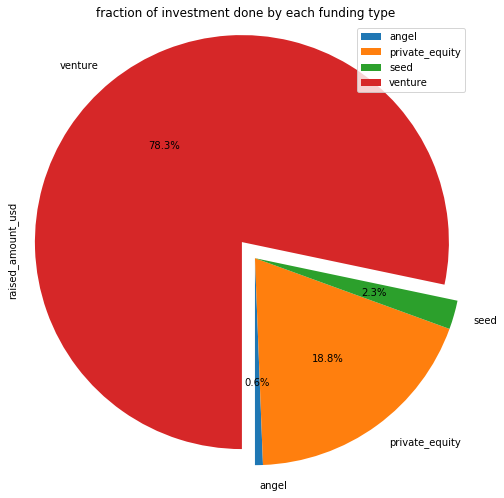

In [94]:
plot = master_frame_p1g.plot.pie(y='raised_amount_usd', 
                                 figsize=(7, 7),
                                # with no shadows
                                shadow=False,
                                # with one slide exploded out
                                explode=(0, 0, 0, 0.1),
                                # with the start angle at 90%
                                startangle=270,
                                # with the percent listed as a fraction
                                autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title('fraction of investment done by each funding type')
# View the plot
plt.tight_layout()
plt.show()

In [95]:
master_frame_p1bg=master_frame_FT.groupby('funding_round_type').median()

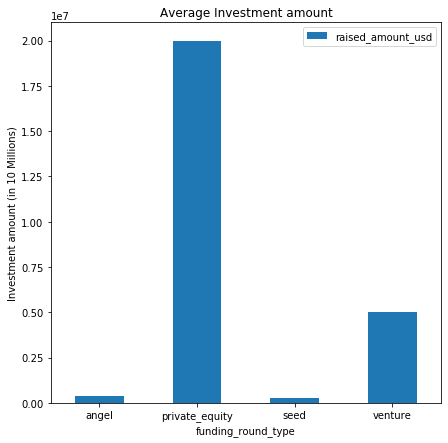

In [96]:
ax = master_frame_p1bg.plot.bar(rot=0,figsize=(7, 7))
plt.ylabel('Investment amount (in 10 Millions)')
plt.title('Average Investment amount')
plt.show()

In [97]:
master_frame_p2=top9.groupby('country_code')['raised_amount_usd'].sum()
#master_frame_p2.sort_values(ascending = False)

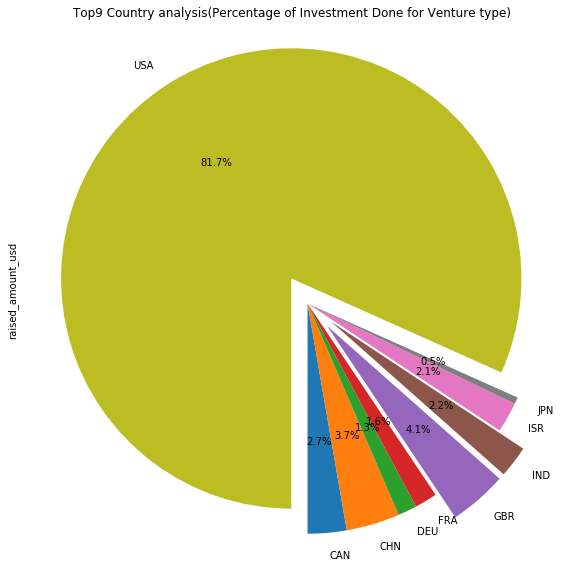

In [98]:
plot = master_frame_p2.plot.pie(y='raised_amount_usd', 
                                 figsize=(8, 8),
                                # with no shadows
                                shadow=False,
                                # with one slide exploded out
                                explode=(0, 0, 0, 0, 0.13 ,0.13, 0, 0, 0.13),
                                # with the start angle at 90%
                                startangle=270,
                                # with the percent listed as a fraction
                                autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title('Top9 Country analysis(Percentage of Investment Done for Venture type)')
# View the plot
plt.tight_layout()
plt.show()

In [99]:
D1top3=D1.groupby('main_sector').count().sort_values(ascending = False,by='raised_amount_usd').head(3)
D1top3=D1top3[['raised_amount_usd']]
D1top3

,raised_amount_usd
main_sector,
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350


In [100]:
D2top3=D2.groupby('main_sector').count().sort_values(ascending = False,by='raised_amount_usd').head(3)
D2top3=D2top3[['raised_amount_usd']]
D2top3

,raised_amount_usd
main_sector,
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130


In [101]:
D3top3=D3.groupby('main_sector').count().sort_values(ascending = False,by='raised_amount_usd').head(3)
D3top3=D3top3[['raised_amount_usd']]
D3top3

,raised_amount_usd
main_sector,
Others,110
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


In [102]:
#merge all three df on main_sector to create stacked bar plot
m12=pd.merge(D1top3,D2top3,on='main_sector',how="outer")
m123=pd.merge(m12,D3top3,on='main_sector',how="outer")

In [103]:
m123.keys()

Index(['raised_amount_usd_x', 'raised_amount_usd_y', 'raised_amount_usd'], dtype='object')

In [104]:
#rename it to country names
m123.rename(columns={'raised_amount_usd_x':'Country1(USA)'},inplace=True)
m123.rename(columns={'raised_amount_usd_y':'Country2(GBR)'},inplace=True)
m123.rename(columns={'raised_amount_usd':'Country3(IND)'},inplace=True)

In [105]:
m123

,Country1(USA),Country2(GBR),Country3(IND)
main_sector,,,
Others,2950.00000,147.00000,110.00000
"Social, Finance, Analytics, Advertising",2714.00000,133.00000,60.00000
Cleantech / Semiconductors,2350.00000,130.00000,nan
"News, Search and Messaging",nan,nan,52.00000


In [106]:
#taking transpose of df to plot it against countries
m123T=m123.transpose()

In [107]:
m123T.sum(axis=1)

Country1(USA)   8014.00000
Country2(GBR)    410.00000
Country3(IND)    222.00000
dtype: float64

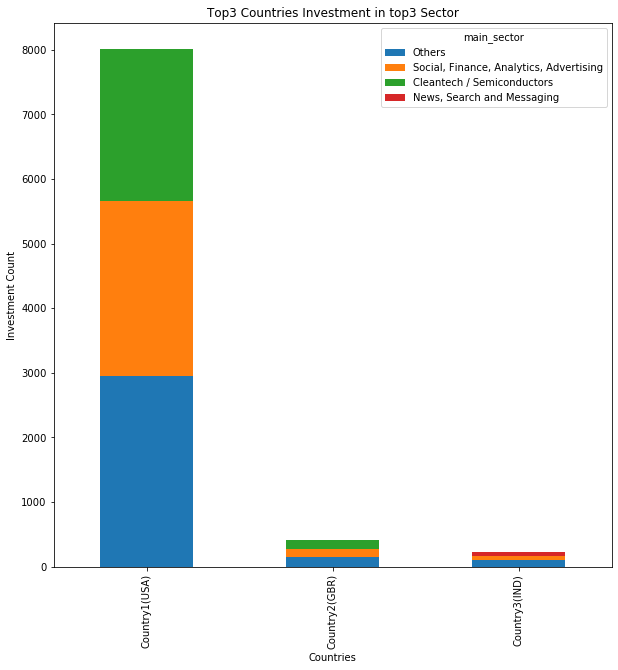

In [109]:
m123.transpose().plot(kind="bar",stacked=True,figsize=(10, 10))
plt.ylabel('Investment Count')
plt.xlabel('Countries')
plt.title('Top3 Countries Investment in top3 Sector')
plt.show()